In [1]:
# Stylianos Topalidis
# AEM: 9613
# email: styltopa@ece.auth.gr 

In [2]:
import numpy as np
from math import pi, log 
import matplotlib.pyplot as plt


Max value of log pdf given theta_1: -17.085184994873114
theta_1(hat): 2.6
Max value of log pdf given theta_2: -7.394909225298219
theta_2(hat): -3.2


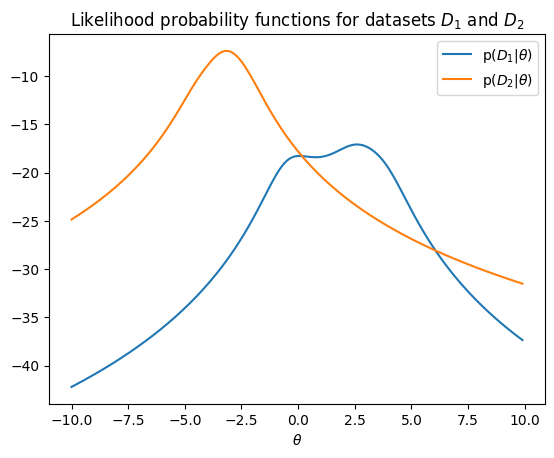

In [3]:
# A1 Estimation of theta parameters (theta_1(hat) and theta_2(hat))

# x1: the values of indicator x for D1 
x1 = np.array([2.8,-0.4,-0.8, 2.3,-0.3, 3.6, 4.1])
x2 = np.array([-4.5, -3.4, -3.1, -3.0, -2.3])
thetaStart = -10
thetaStop = 10
thetaStep = 0.1
# the various theta for which we compute the pdf
thetaRange = np.arange(thetaStart, thetaStop, thetaStep)

# xSpace: has the same x in each column
# thetaSpace: has the same theta in each row
# each row has the likelihood values for a single theta
x1Space, theta1Space = np.meshgrid(x1, thetaRange)
x2Space, theta2Space = np.meshgrid(x2, thetaRange)

# x1Space, thetaSpace, p1 are all of dimensions: len(thetaRange) x len(x1) 
# Accordingly for x2Space, thetaSpace, p2
p1 = np.empty((x1Space.shape))     # same as p1 = np.empty((theta1Space.shape))     
p1 = (1/pi)*(1/(1+np.power((x1Space-theta1Space), 2)))

p2 = np.empty((x2Space.shape))     # same as p2 = np.empty((theta2Space.shape))     
p2 = (1/pi)*(1/(1+np.power((x2Space-theta2Space), 2)))


# pDGivenTheta1: the product of all probability density functions for all data x for 
# a specific theta. In other words, it is the product of all elements of a column
# multiply.reduce(arr, 0) returns the array containing the product of the
# elements of arr over dimension 1 (product of elements of each row).
# Same goes for the pDGivenTheta2
pDGivenTheta1 = np.multiply.reduce(p1, 1)
pDGivenTheta2 = np.multiply.reduce(p2, 1)

logPDTheta1 = np.log(pDGivenTheta1)
logPDTheta2 = np.log(pDGivenTheta2)


fig, ax0 = plt.subplots(1, 1)
ax0.plot(thetaRange, logPDTheta1, label=r'p($D_1\vert$$\theta$)')
ax0.plot(thetaRange, logPDTheta2, label=r'p($D_2\vert$$\theta$)')
ax0.legend()
ax0.set_xlabel(r'$\theta$')
ax0.set_xlabel(r'$\theta$')
ax0.set_title(r'Likelihood probability functions for datasets '\
    r'$D_1$ and $D_2$')


# Find the exact theta giving the maximum logpDTheta
# Since there are two maxima, it is better that we estimate the theta parameter 
# through the largest of the two.

# theta_1(hat)
print('Max value of log pdf given theta_1:', np.max(logPDTheta1))
maxLogPDThetaIndexMat = np.where(logPDTheta1 == np.max(logPDTheta1))

# Index corresponding to the maximum likelihood
maxLogPDTheta1Index = maxLogPDThetaIndexMat[0][0]

# theta1 value estimation (rounded in the last 3 decimals)
theta1Estimate = round(thetaRange[maxLogPDTheta1Index], 3)
print('theta_1(hat):', theta1Estimate)

# theta_2(hat)
print('Max value of log pdf given theta_2:', np.max(logPDTheta2))
maxLogPDThetaIndexMat = np.where(logPDTheta2 == np.max(logPDTheta2))

# Index corresponding to the maximum likelihood
maxLogPDTheta2Index = maxLogPDThetaIndexMat[0][0]

# theta2 value estimation (rounded in the last 3 decimals)
theta2Estimate = round(thetaRange[maxLogPDTheta2Index], 3)
print('theta_2(hat):', theta2Estimate)




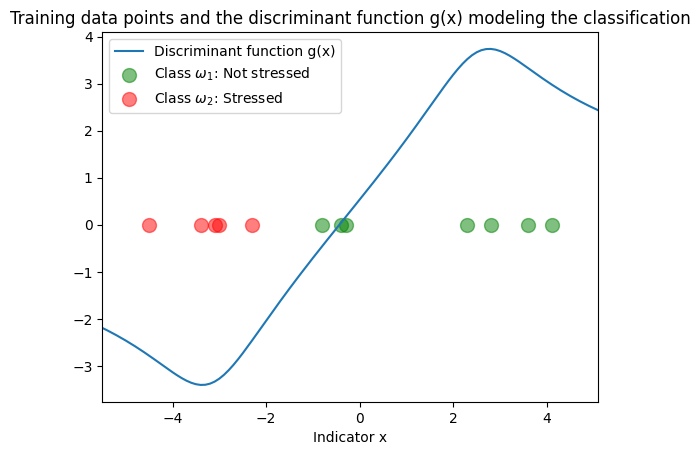

In [4]:
# Discriminant function g(x)
xStart = -10
xStop = 10
xStep = 0.1
xRange = np.arange(xStart,xStop, xStep)

pXGivenTheta1Range = (1/pi)*(1/(1+np.power((xRange-theta1Estimate), 2)))
pXGivenTheta2Range = (1/pi)*(1/(1+np.power((xRange-theta2Estimate), 2)))
# the apriori probabilities are given by the relative frequency 
# of the cases of each class (omega1: not stressed, omega2: stressed)
aPriori1 = len(x1)/(len(x1)+len(x2))
aPriori2 = len(x2)/(len(x1)+len(x2))

# the discrinant function calculated over a range of x (xRange)
gX = np.log(pXGivenTheta1Range) - np.log(pXGivenTheta2Range) + aPriori1 - aPriori2

# pdfs calculated on the x1 and x2
pXGivenTheta1OnX1= (1/pi)*(1/(1+np.power((x1-theta1Estimate), 2)))
pXGivenTheta2OnX2 = (1/pi)*(1/(1+np.power((x2-theta2Estimate), 2)))

fig, ax = plt.subplots()
ax.scatter(x1, np.zeros_like(x1), s = 100, c="green", alpha=0.5, marker='o',
           label = r'Class $\omega_1$: Not stressed')
ax.scatter(x2, np.zeros_like(x2), s = 100, c="red", alpha=0.5, marker='o',
           label = r'Class $\omega_2$: Stressed')
ax.plot(xRange, gX, label = 'Discriminant function g(x)')

minX = np.min(np.concatenate((x1, x2), axis=0))
maxX = np.max(np.concatenate((x1, x2), axis=0))
ax.set_xlim([minX-1, maxX+1])
ax.set_xlabel("Indicator x")
ax.set_title("Training data points and the discriminant function g(x) modeling the classification")

plt.legend()

In [5]:
# The sign of the discriminant function (its being positive or negative) 
# defines the decision rule for the classification

# in gXSign we save the values xi where the sign of g(x) changes
# and also what it changes into +1 (for becoming positive) and -1 for becoming 
# negative
signChangesCounter = -1

# Strategy to find the exact decision boundaries

# To find the decision boundaries, we need to find the values of the indicator 
# x where the discriminant function equals 0. In the discrete space, we
# can do this by finding the x so that g[xi] and g[xi+1] do not have the same 
# sign.

# To determine the sign of the discriminant function for all values of x:
# Assuming xi is a point where gX changes sign, we need to compare g[xi] and g[xi+1].
# This way, if g[xi] < g[xi+1] the slope is ascending meaning gX[xj] < 0, 
# for all xj < xi down to another xi' where gX changes sign again and 
# gX[xk] > 0 up to another xi'' where gX changes sign again .

# The same logic for the sign of gX applies when g[xi] > g[xi+1] (descending slope),
# meaning
# gX[xj] > 0, xj < xi and 
# gX[xj] < 0, xj > xi

# gXSignList is a list saving all 2d lists [x, signIndicator] where x is the value 
# of the indicator x of the datapoint where the sign change occured and 
# signIndicator is +1 if the gX is ascending
# beyond 0 (crosses the zero line) 
gXSignList = []
for xi in range(len(gX)-1):
    # if the next value of gX[xi] and gX[xi+1] are both positive or negative 
    # gX did not change sign (did not) 
    if gX[xi] * gX[xi + 1] <= 0:
        if gX[xi] < gX[xi + 1]:
            signChangesCounter = signChangesCounter + 1
            gXSignList.append([xRange[xi], +1])
        elif gX[xi] > gX[xi + 1]:
            signChangesCounter = signChangesCounter + 1
            gXSignList.append([xRange[xi], -1])


# gXSignList conversion to a standard dimensions array
gXSignArr = np.array(gXSignList)
print(gXSignArr)


# According to the discriminant function plotted above, the indicator x is 
# positive for the not stressed players and negative for the stressed ones. 

# The decision boundary lies approximately on x = -0.5 
# (g(x) < 0 (stressed), for x < -0.5, g(x) > 0 (not stressed) for x > -0.5)

[[-0.5  1. ]]


In [6]:
# Part B
# Baeysian estimation of parameter theta


# Calculation of p(D|theta) across all values of theta (we can do this since p(x|theta) 
# is considered known for each class)
# These are calculated in the exact same way as in the maximum likelihood estimation of theta
# so their calculation will not be repeated here (they are the variables pXGivenTheta1OnX1, pXGivenTheta2OnX2).


# p(theta), p(D|theta) are now known so we can calculate
# p(theta|D) and by graphing it we can derive the best estimation for theta for each class.

# p(x|theta,D), p(theta|D) are known (p(x|theta,D) = p(x|theta) for a specific class D)
# for the so we can calculate p(x|D)
# Calculation of p(x|D)